In [49]:
import numpy as np
import matplotlib.pylab as plt

In [50]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [9.5, 13]
plt.rcParams['figure.subplot.left'] = plt.rcParams['figure.subplot.bottom'] = .1
plt.rcParams['figure.subplot.right'] = plt.rcParams['figure.subplot.top'] = .9

In [51]:
dataset = np.load('./data/2018-01-01__2019-01-01__NConservatory_npWeekdayAllOrderedSensorsTimeRef.npy')

In [52]:
dataset

array([[-0.54419175, -0.54419175, -0.57077136, ...,  0.        ,
         0.        ,  0.        ],
       [-0.54419175, -0.57077136, -0.4910508 , ...,  0.        ,
         0.        ,  0.25373134],
       [-0.57077136, -0.4910508 , -0.4910508 , ...,  0.        ,
         0.25373134,  0.25373134],
       ...,
       [-0.23887157, -0.31835641, -0.34485413, ...,  1.        ,
         1.        ,  1.        ],
       [-0.31835641, -0.34485413, -0.34485413, ...,  1.        ,
         1.        ,  1.        ],
       [-0.34485413, -0.34485413, -0.34485413, ...,  1.        ,
         1.        ,  1.        ]])

In [53]:
def morph_data( dataWindow, maxMutationRescale = 12, morphWindowSize = 15, numMorphableSensors = 16, numSensorValuesPerDay = 96 ):
    
    validRangeUpperBound = numMorphableSensors * numSensorValuesPerDay
    
    startIndex = np.random.randint( low = 0, high = validRangeUpperBound - morphWindowSize)
    endIndex = startIndex + morphWindowSize
    
    morphedDataWindow = dataWindow.copy() 
    mutationAmount = np.random.randint(low=1, high=maxMutationRescale)
    morphedDataWindow[startIndex:endIndex] *= mutationAmount
    
    plt.figure()
    plt.plot(dataWindow)
    plt.plot(morphedDataWindow)
    plt.title('{} {}'.format(mutationAmount, mutationAmount//3))
    return morphedDataWindow, mutationAmount
    

In [54]:
def morph_data( dataWindow, maxMutationFactor = 12, morphWindowSize = 15, numMorphableSensors = 16, numSensorValuesPerDay = 96 ):
    
    validRangeUpperBound = numMorphableSensors * numSensorValuesPerDay
    
    startIndex = np.random.randint( low = 0, high = validRangeUpperBound - morphWindowSize)
    endIndex = startIndex + morphWindowSize
    
    morphedDataWindow = dataWindow.copy() 
    
    mutationFactor = np.random.randint(low = 1, high = maxMutationFactor)
    morphedDataWindow[startIndex:endIndex] *= mutationFactor
    
    plt.figure()
    plt.plot(morphedDataWindow, '.--r')
    plt.plot(dataWindow, linewidth=2)
    
    plt.title('mutation factor {}, at index {} '.format(mutationFactor, startIndex))
    
    return morphedDataWindow, mutationFactor
    

In [55]:
def mutate_and_evaluate_dataset (dataset):
    nWindows = dataset.shape[0]
    for iWindow in range(10):
        morph_data(dataset[iWindow,:])
        # TODO: send_through_model(s) and determine whether day is an anomaly 

<IPython.core.display.Javascript object>


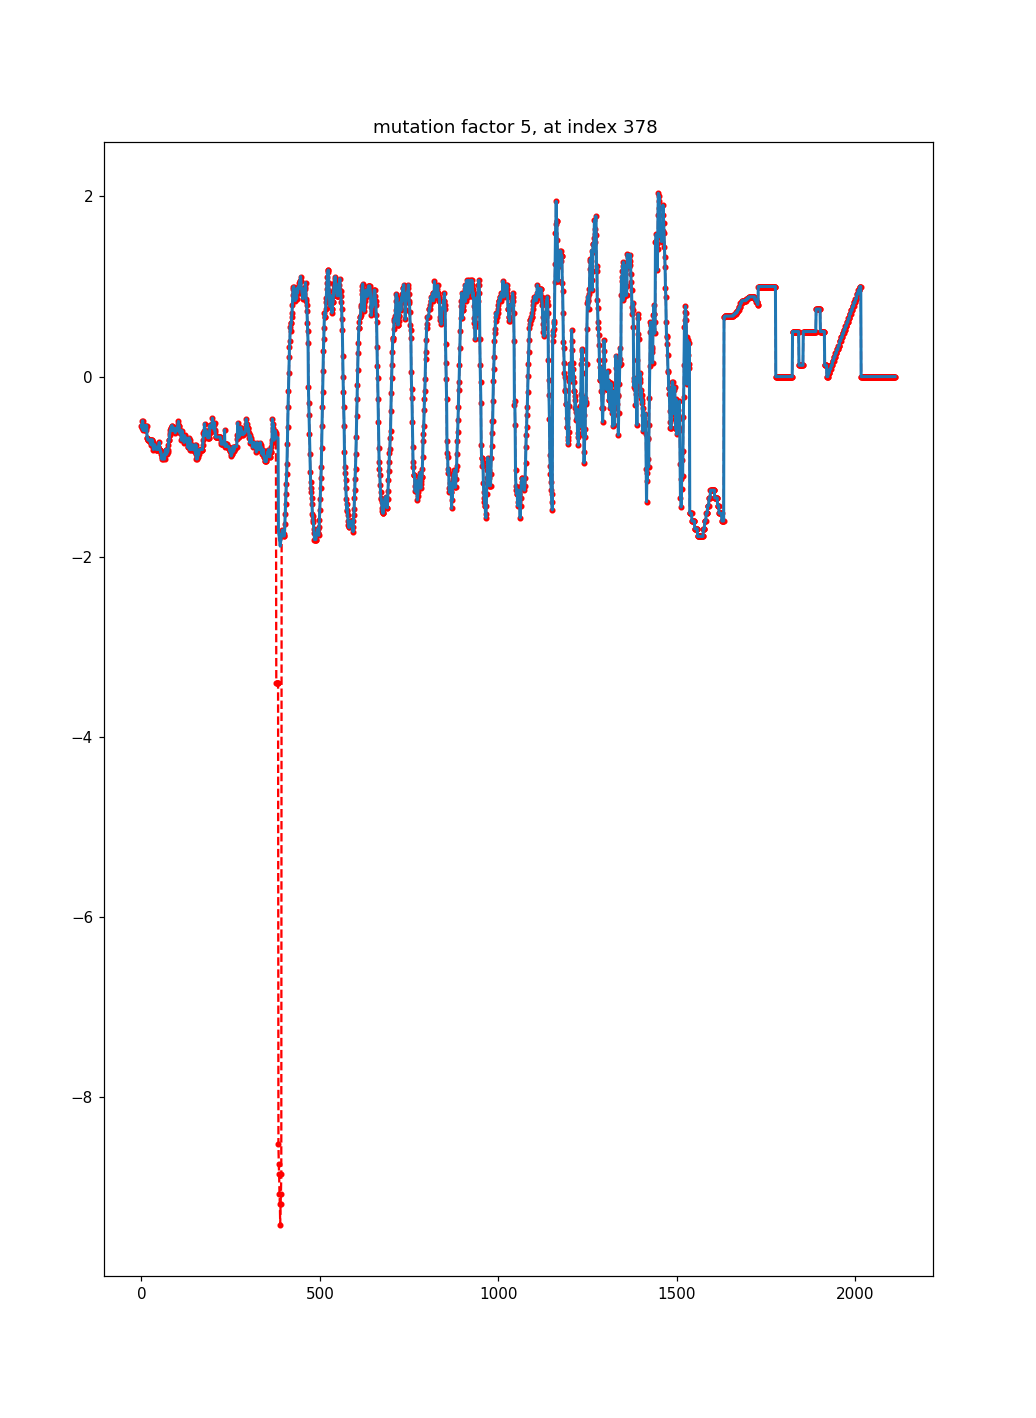

<IPython.core.display.Javascript object>


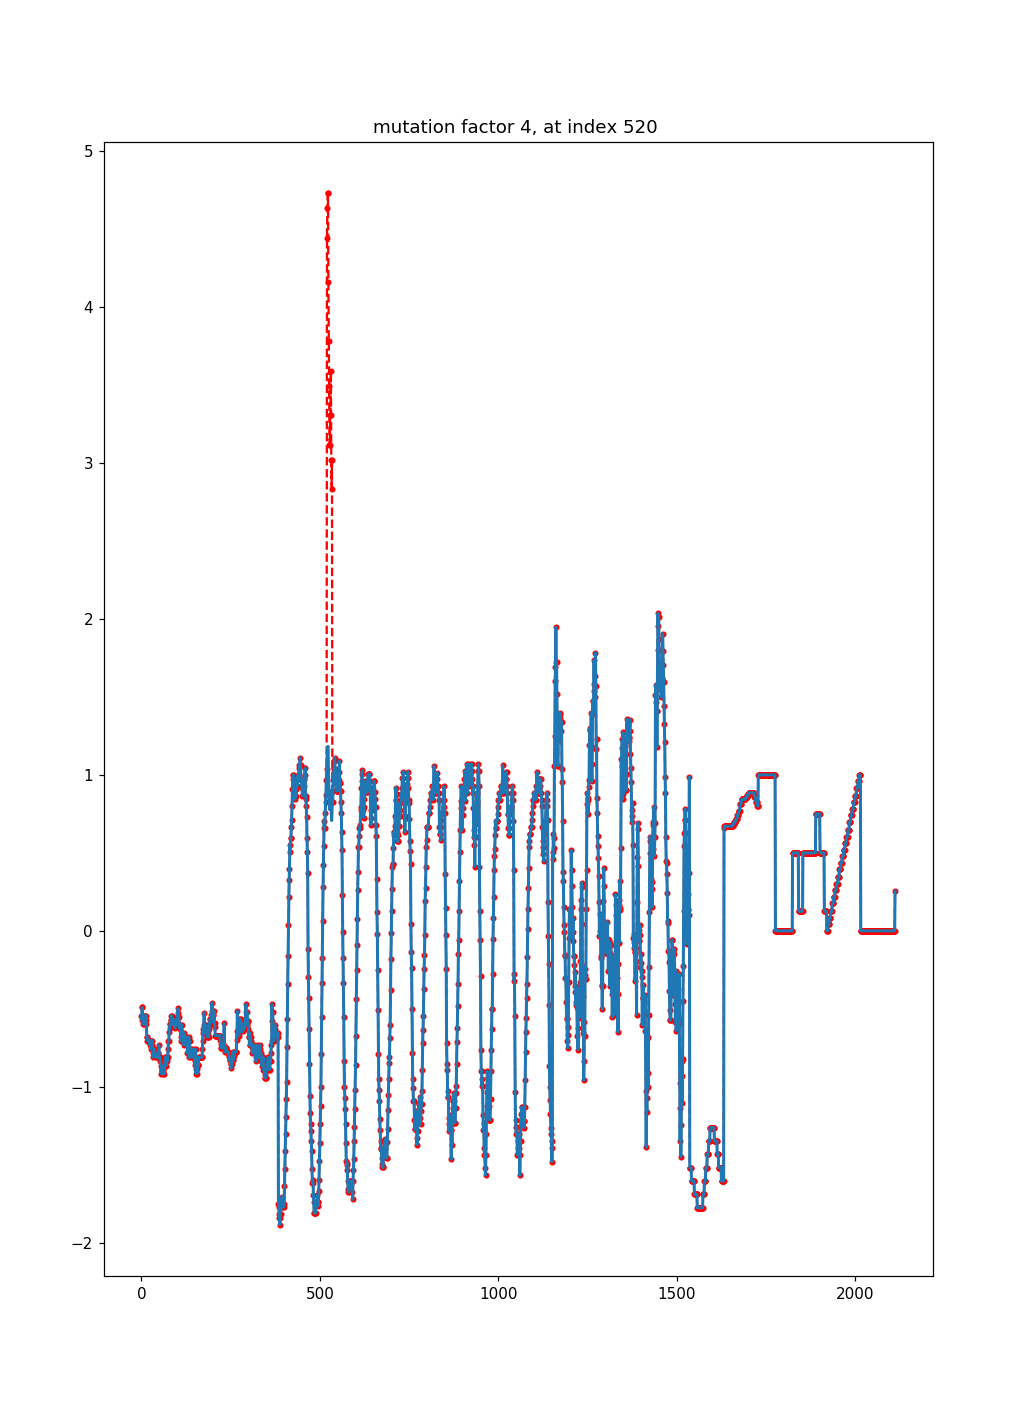

<IPython.core.display.Javascript object>


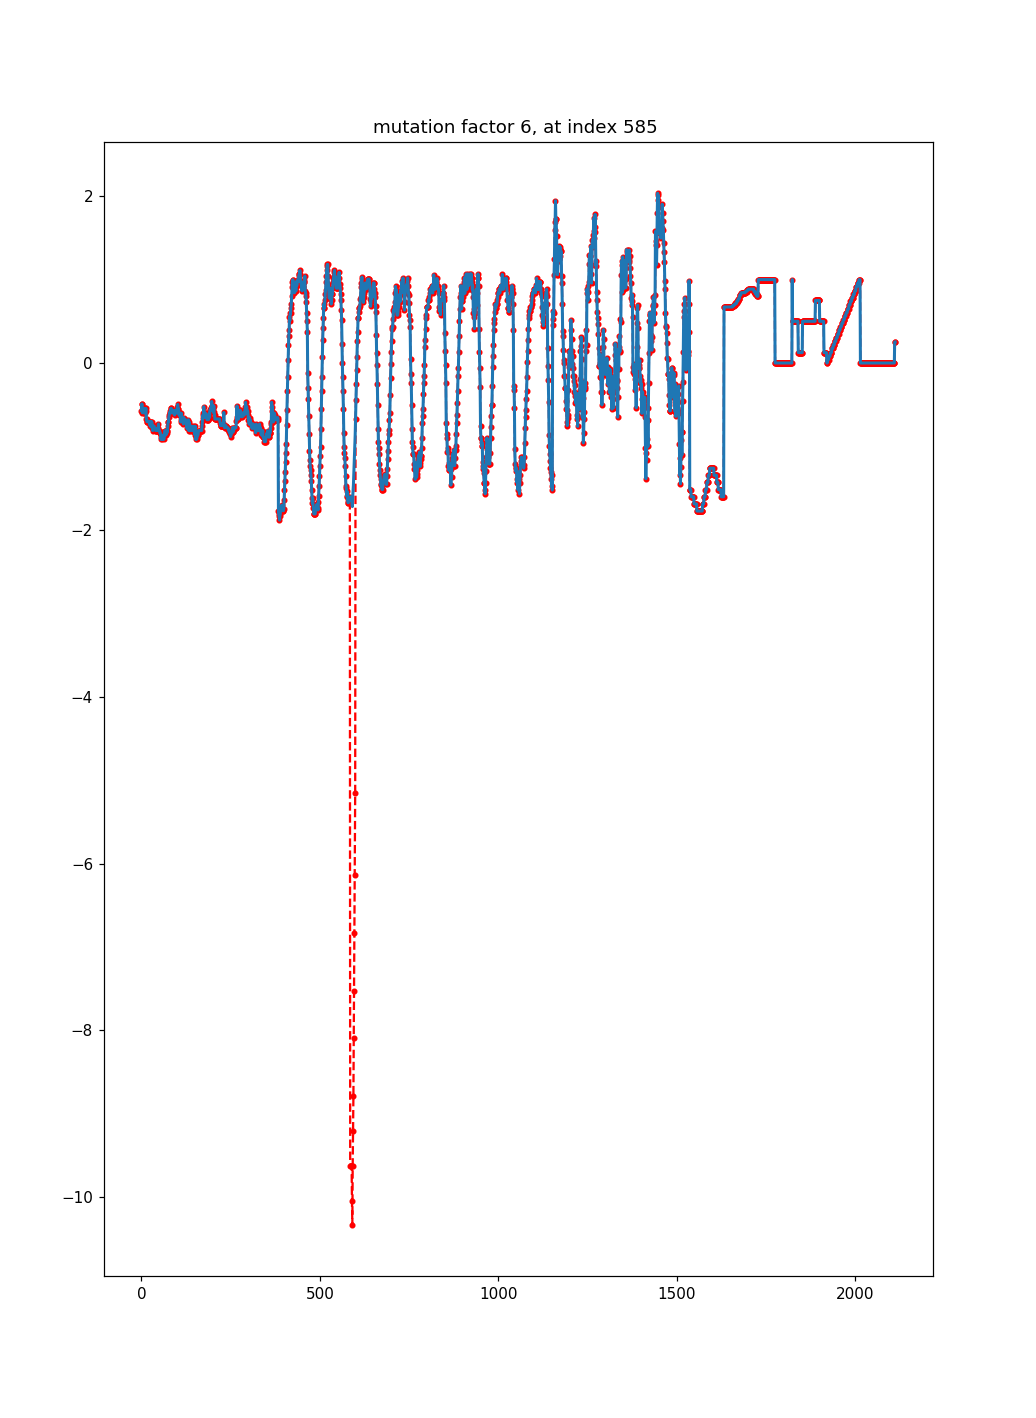

<IPython.core.display.Javascript object>


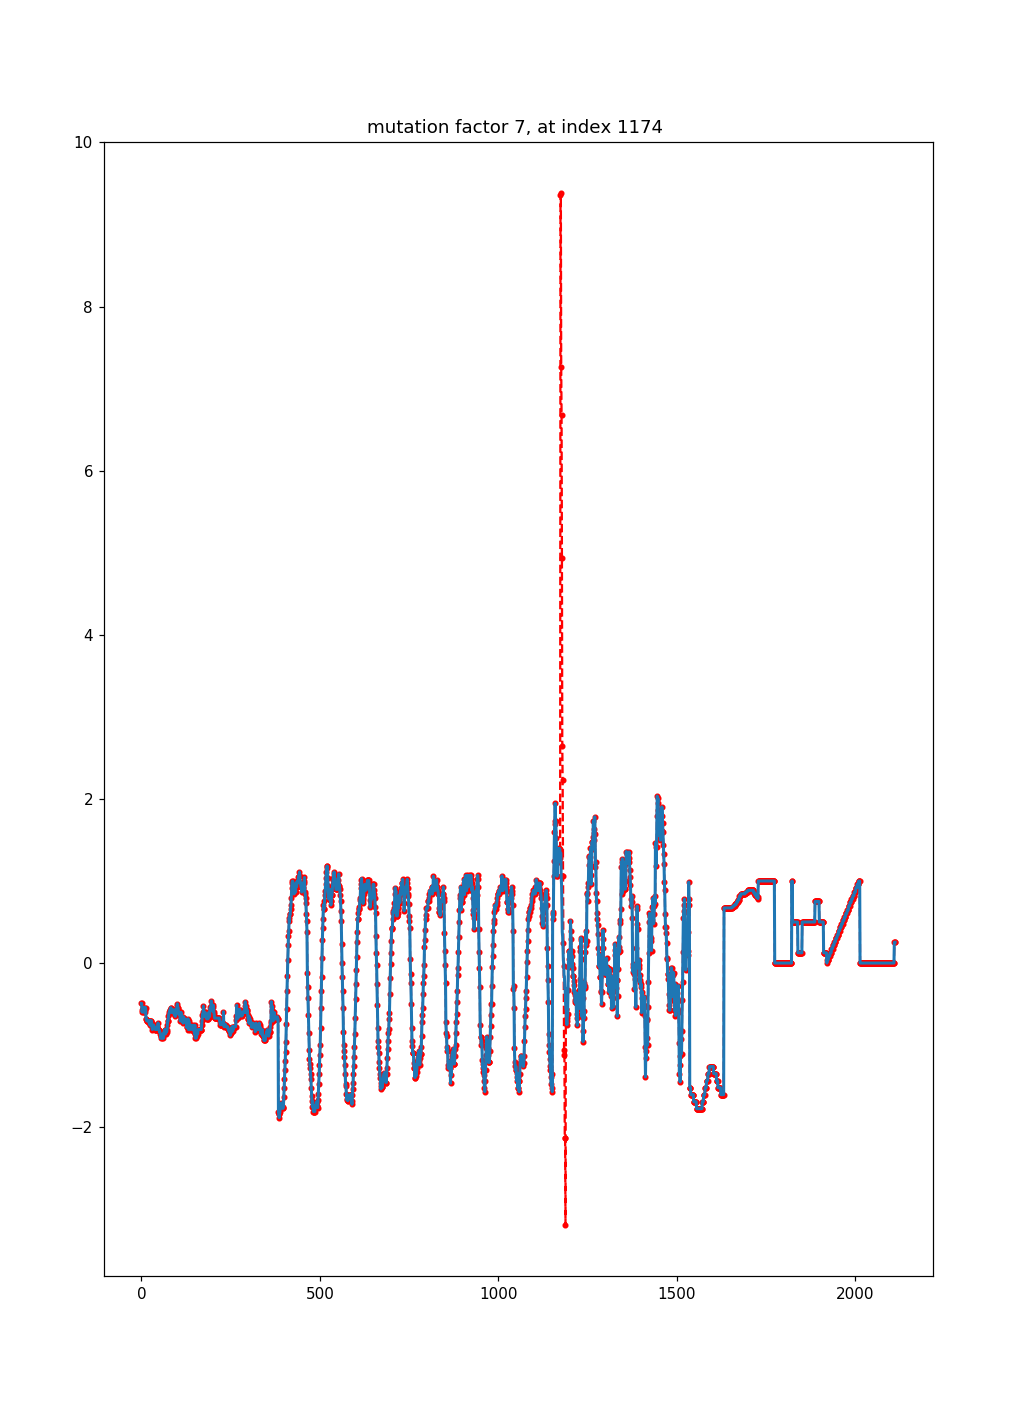

<IPython.core.display.Javascript object>


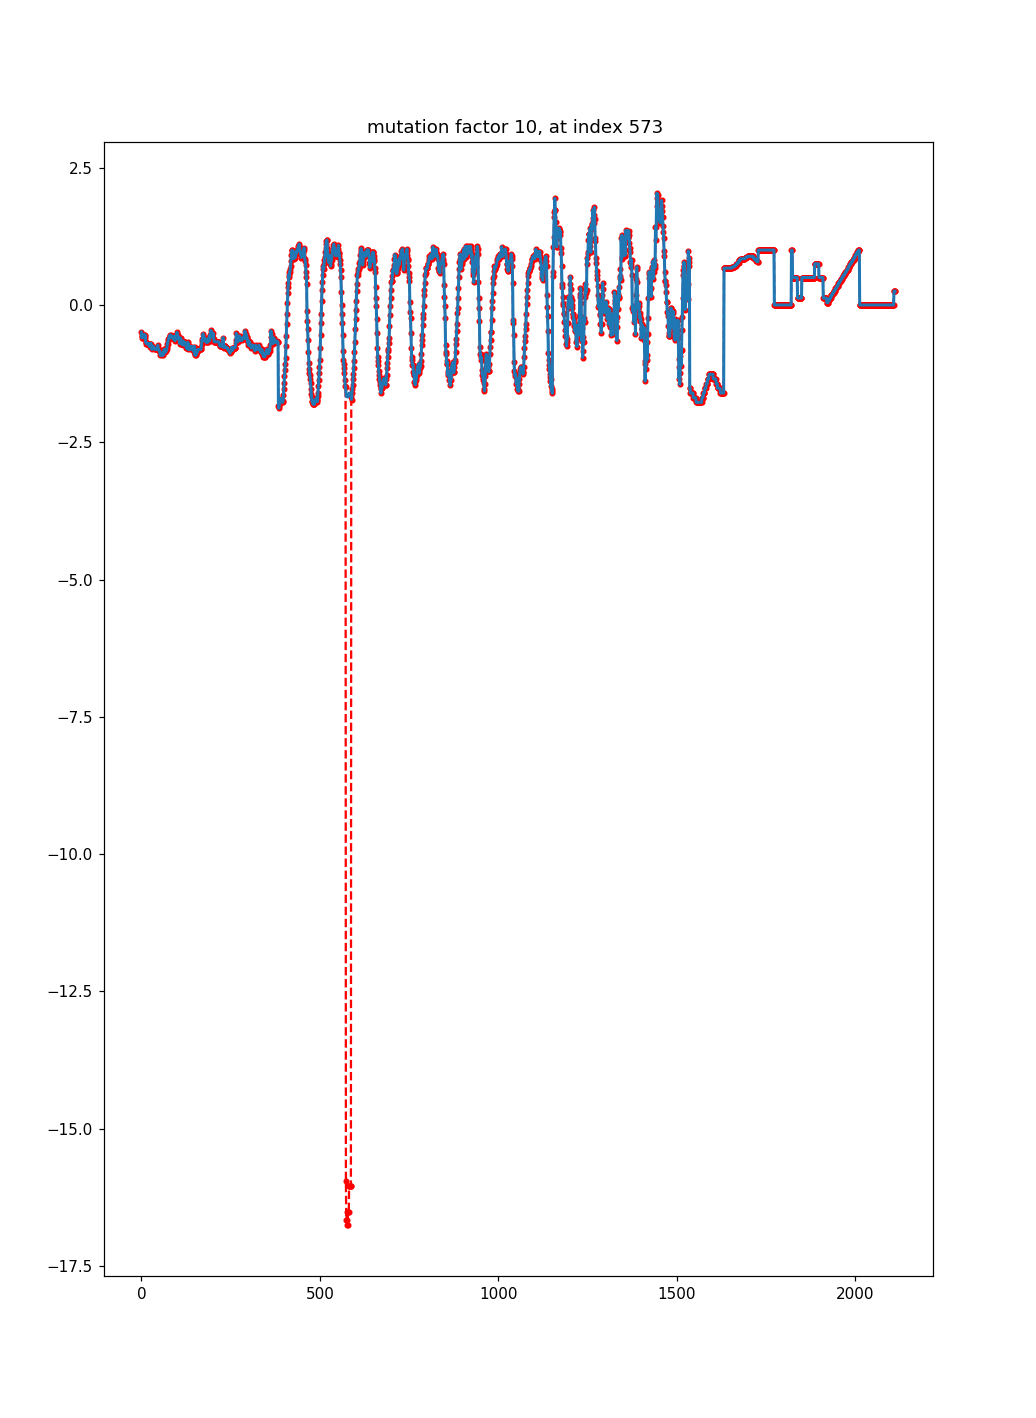

<IPython.core.display.Javascript object>


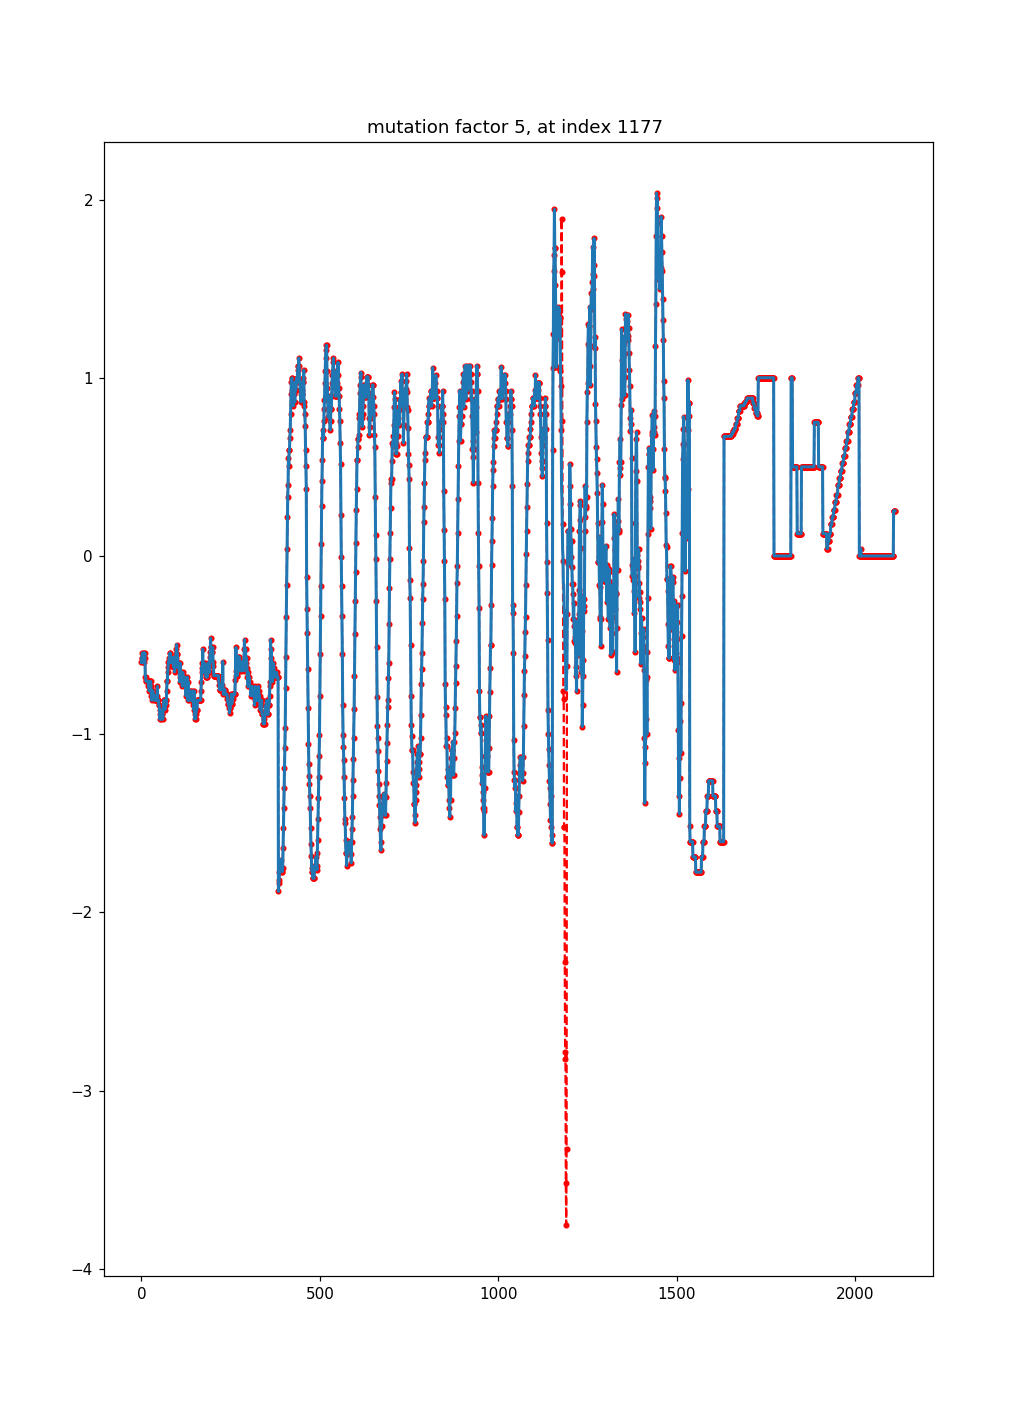

<IPython.core.display.Javascript object>


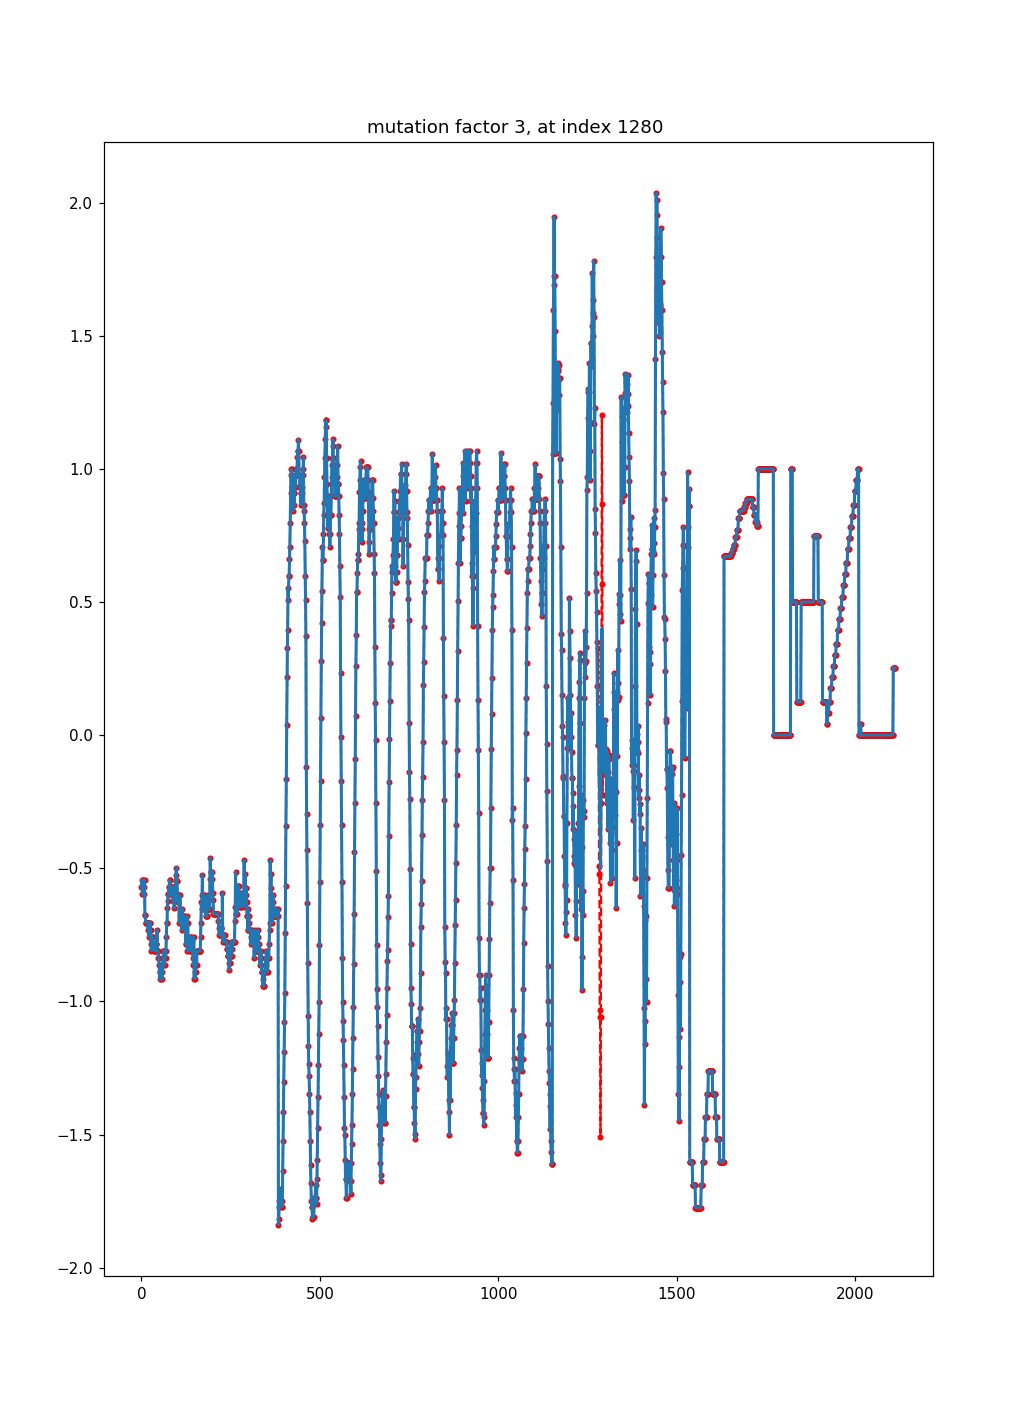

<IPython.core.display.Javascript object>


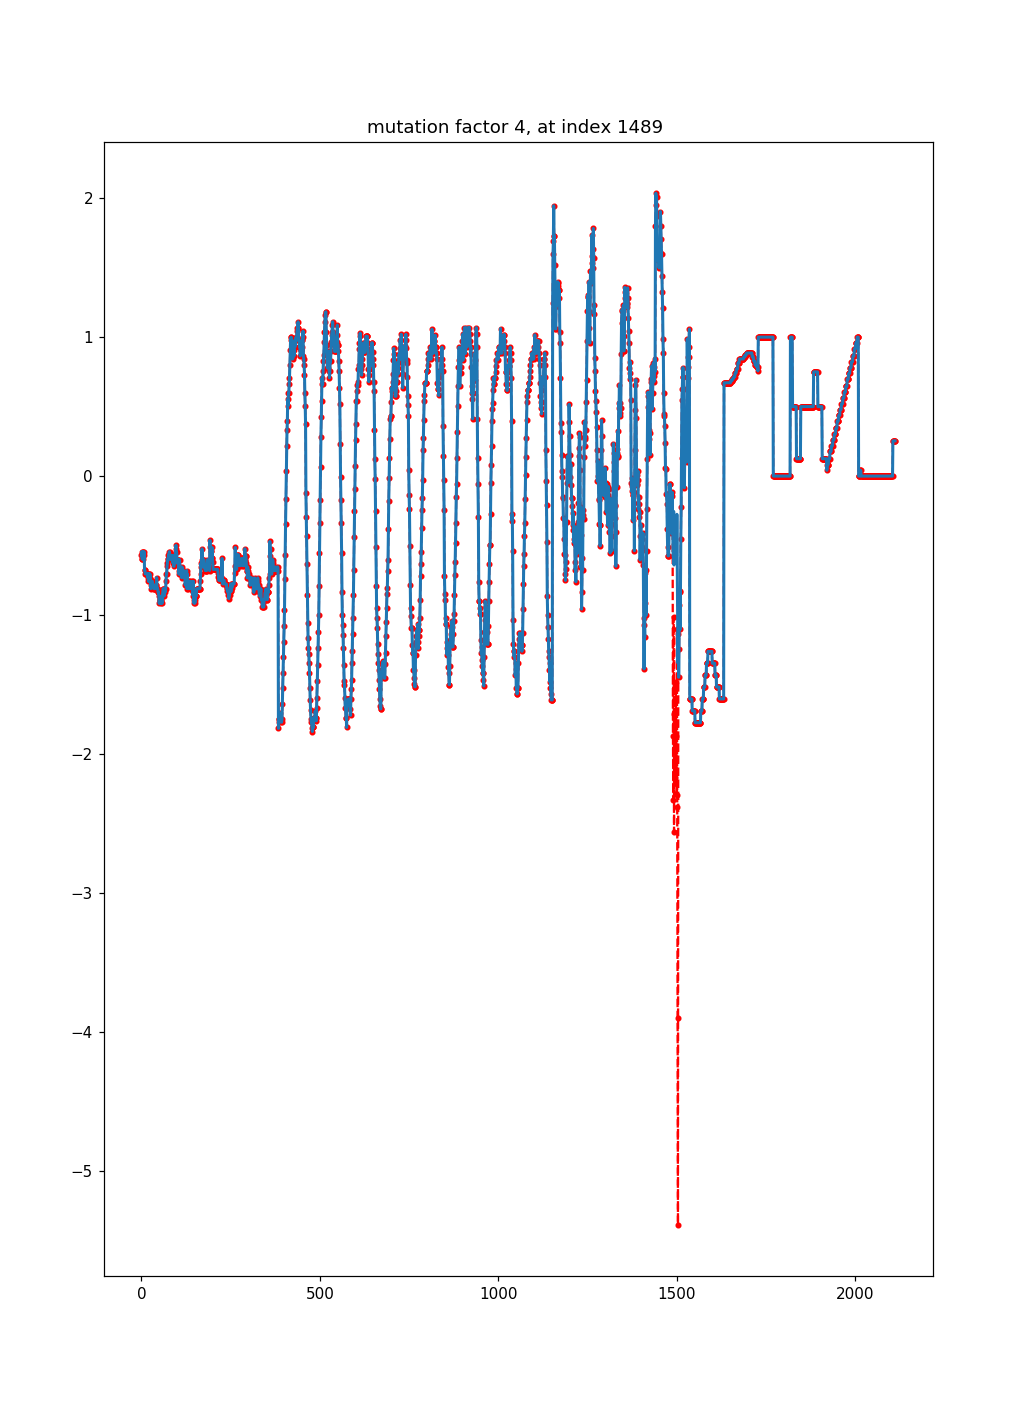

<IPython.core.display.Javascript object>


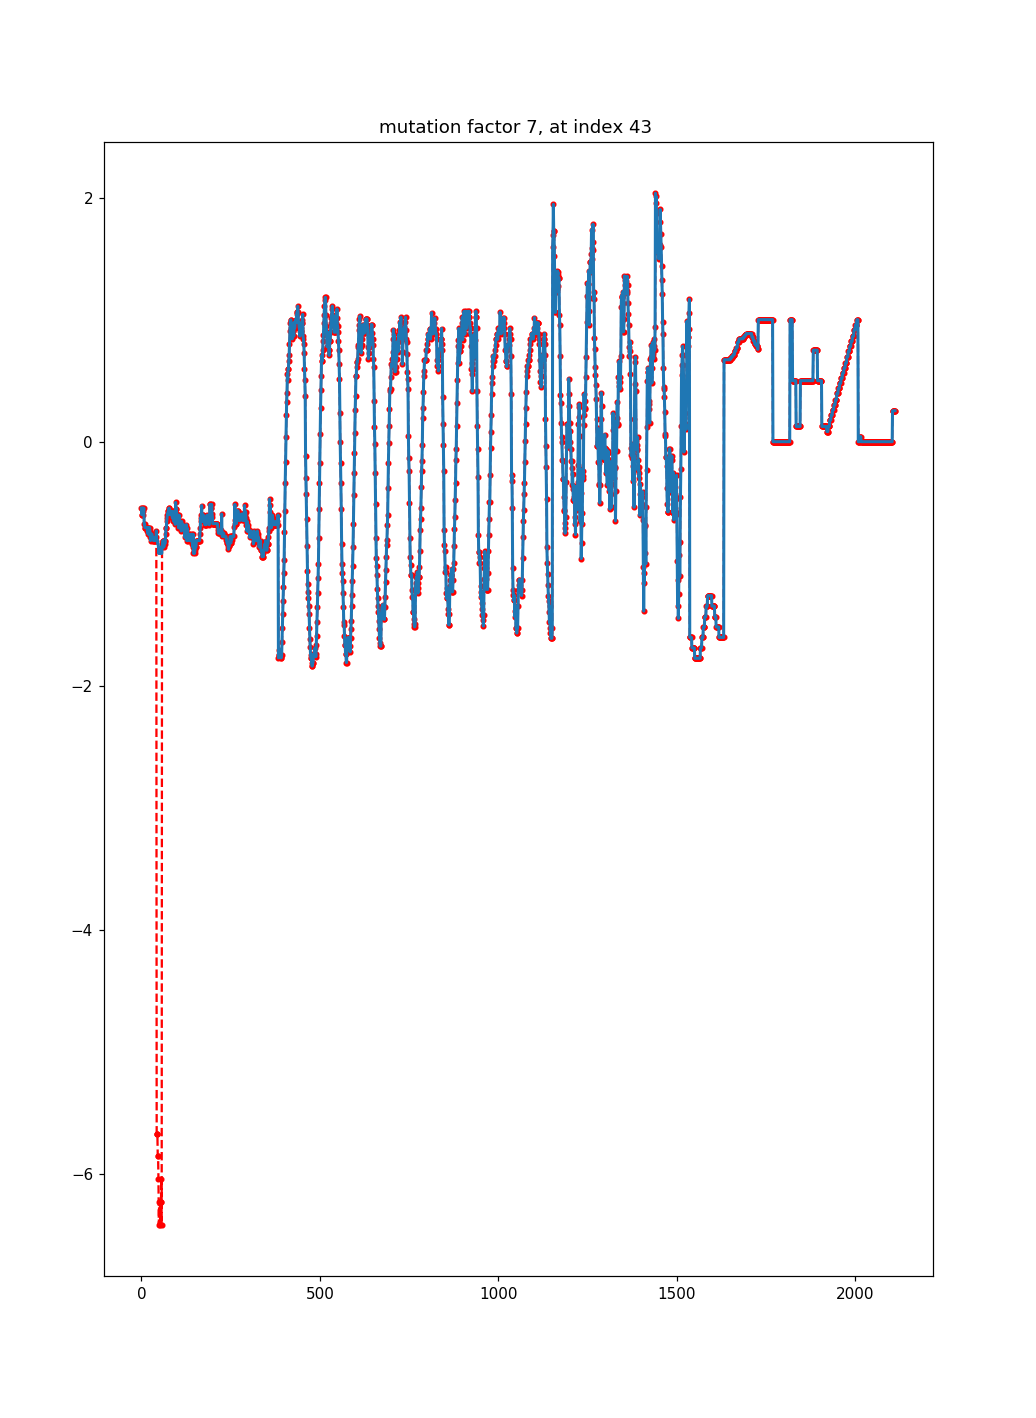

<IPython.core.display.Javascript object>


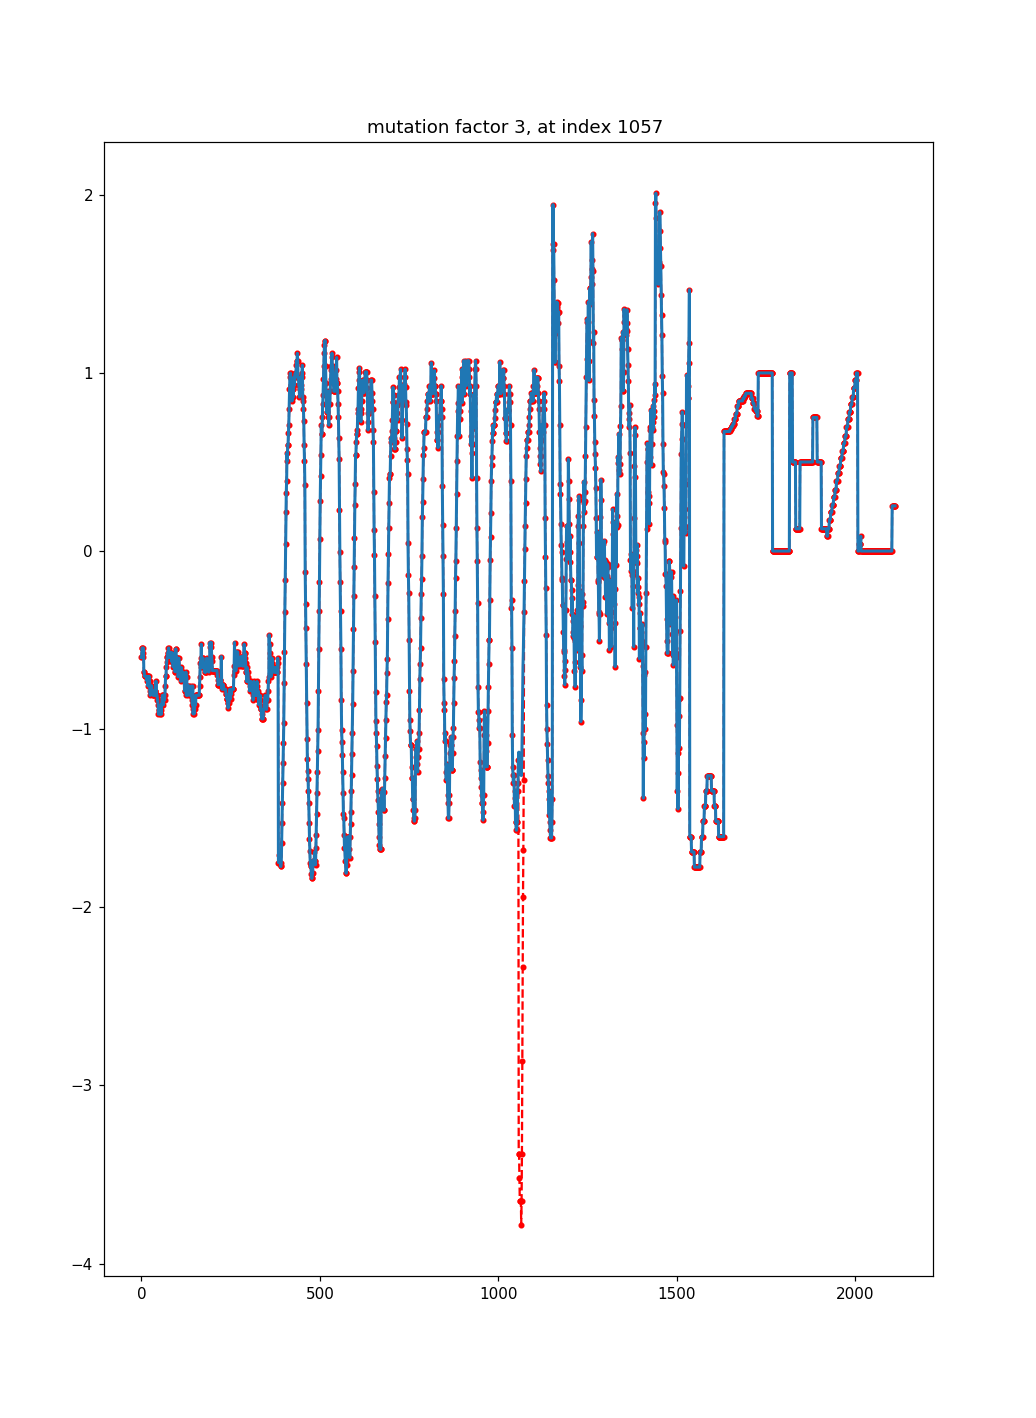

In [56]:
mutate_dataset(dataset)